# Loadin Data

In [ ]:
import nltk
import re
import spacy
import pandas as pd
import numpy as np

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DOC_PATH = "/content/drive/MyDrive/IR6/CISI.ALL"
QUERY_PATH = '/content/drive/MyDrive/IR6/CISI.QRY'
REL_PATH = '/content/drive/MyDrive/IR6/CISI.REL'

In [ ]:
f= open(DOC_PATH, 'r')
doc = (f.read())

In [ ]:
body = re.findall('\.W\s+([\s\S]+?)(?=\.X|$)', doc)
print(len(body))

1460


In [ ]:
title = re.findall('\.T\s+([\s\S]+?)(?=\.A|$)', doc)
print(title)

['18 Editions of the Dewey Decimal Classifications\n', 'Use Made of Technical Libraries\n', 'Two Kinds of Power\nAn Essay on Bibliographic Control\n', 'Systems Analysis of a University Library; \nfinal report and research project\n', 'A Library Management Game:\na report on a research project\n', 'Abstracting Concepts and Methods\n', 'Academic Library Buildings\nA Guide to Architectural Issues and Solutions\n', 'The Academic Library Essays in Honor of Guy R. Lyle\n', 'Access to Libraries in College\n', 'Access to Periodical Resources\n', 'The Acquisition of Library Materials\n', 'Acquisition from the 3rd World\n', 'AD695049\n', 'The Administration of the College Library\n', 'Information Flow in Research and Development Laboratories\n', 'Adopting the Library of Congress Classification System\n', 'Adventures in Librarianship\n', 'Selective Dissemination of Information\n', 'Adventures in Theory of Languages\n', 'The Age of Jewett: Charles Coffin Jewett and American Librarianship\n1841-186

In [ ]:
f = open(QUERY_PATH, 'r')
doc = f.read()

In [ ]:
queries = re.findall('\.W\s+([\s\S]+?)(?=\.I|$)', doc)

In [ ]:
f= open(REL_PATH, 'r')
relevance_list = {}
for line in f:
  fields = line.split()
  query_id = int(fields[0])
  if query_id not in relevance_list:
    relevance_list[query_id] = []
  relevance_list[query_id].append(fields[1])

In [ ]:
relevance_list

{1: ['28',
  '35',
  '38',
  '42',
  '43',
  '52',
  '65',
  '76',
  '86',
  '150',
  '189',
  '192',
  '193',
  '195',
  '215',
  '269',
  '291',
  '320',
  '429',
  '465',
  '466',
  '482',
  '483',
  '510',
  '524',
  '541',
  '576',
  '582',
  '589',
  '603',
  '650',
  '680',
  '711',
  '722',
  '726',
  '783',
  '813',
  '820',
  '868',
  '869',
  '894',
  '1162',
  '1164',
  '1195',
  '1196',
  '1281'],
 2: ['29',
  '68',
  '197',
  '213',
  '214',
  '309',
  '319',
  '324',
  '429',
  '499',
  '636',
  '669',
  '670',
  '674',
  '690',
  '692',
  '695',
  '700',
  '704',
  '709',
  '720',
  '731',
  '733',
  '738',
  '740',
  '1136'],
 3: ['60',
  '85',
  '114',
  '123',
  '126',
  '131',
  '133',
  '136',
  '138',
  '140',
  '346',
  '359',
  '363',
  '372',
  '412',
  '445',
  '454',
  '461',
  '463',
  '469',
  '532',
  '537',
  '540',
  '553',
  '554',
  '555',
  '585',
  '590',
  '599',
  '640',
  '660',
  '664',
  '803',
  '901',
  '909',
  '911',
  '1027',
  '1053',
  '1

# Preprocessing

1. tokens: only tokenization - no lemmatization and no stop words removal
2. tokens_no_sw: tokenization with stop words removal only  
3. lema: tokenization with lemmatization only
4. lema_no_sw: tokenization with both lemmatization and stop words removal

In [ ]:
# Load the language library
nlp = spacy.load('en_core_web_sm')

In [ ]:
tokens = []
for b in body:
  text = nlp(b).text

  # Removing puntuations
  tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens.append(tokenizer.tokenize(text))
  # for w in tokenizer.tokenize(text):
  #   tokens.append(w)

In [ ]:
tokens_no_sw = []
for token in tokens:
  tokens_no_sw.append([word for word in token if word not in nltk.corpus.stopwords.words('english')])

In [ ]:
lema = []
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
for token in tokens:
  stem  = [stemmer.stem(w) for w in token]
  lema.append([lemmatizer.lemmatize(s) for s in stem])

In [ ]:
lema_no_sw = []
for token in tokens_no_sw:
  stem  = [stemmer.stem(w) for w in token]
  lema_no_sw.append([lemmatizer.lemmatize(s) for s in stem])

In [ ]:
lema_no_sw

[['the',
  'present',
  'studi',
  'histori',
  'dewey',
  'decim',
  'classif',
  'the',
  'first',
  'edit',
  'ddc',
  'publish',
  '1876',
  'eighteenth',
  'edit',
  '1971',
  'futur',
  'edit',
  'continu',
  'appear',
  'need',
  'in',
  'spite',
  'ddc',
  'long',
  'healthi',
  'life',
  'howev',
  'full',
  'stori',
  'never',
  'told',
  'there',
  'biographi',
  'dewey',
  'briefli',
  'describ',
  'system',
  'first',
  'attempt',
  'provid',
  'detail',
  'histori',
  'work',
  'spur',
  'growth',
  'librarianship',
  'countri',
  'abroad'],
 ['thi',
  'report',
  'analysi',
  '6300',
  'act',
  'use',
  '104',
  'technic',
  'librari',
  'unit',
  'kingdom',
  'librari',
  'use',
  'one',
  'aspect',
  'wider',
  'pattern',
  'inform',
  'use',
  'inform',
  'transfer',
  'librari',
  'restrict',
  'use',
  'document',
  'it',
  'take',
  'account',
  'document',
  'use',
  'outsid',
  'librari',
  'still',
  'le',
  'inform',
  'transfer',
  'oral',
  'person',
  'perso

# Posting List

In [ ]:
def flatten(l):
    lst = [item for sublist in l for item in sublist]
    return list(set(lst))

In [ ]:
def create_posting_list(token_list):
  token_list = flatten(token_list)
  df = pd.DataFrame(0, columns=(token_list), index=np.arange(0,20))

  for i,b in enumerate(body):
    for token in token_list:
      df.loc[i,token] = b.count(token)
  return df

In [ ]:
df_tokens = create_posting_list(tokens)
df_no_sw = create_posting_list(tokens_no_sw)
df_lema = create_posting_list(lema)
df_lema_no_sw = create_posting_list(lema_no_sw)

# TF-IDF

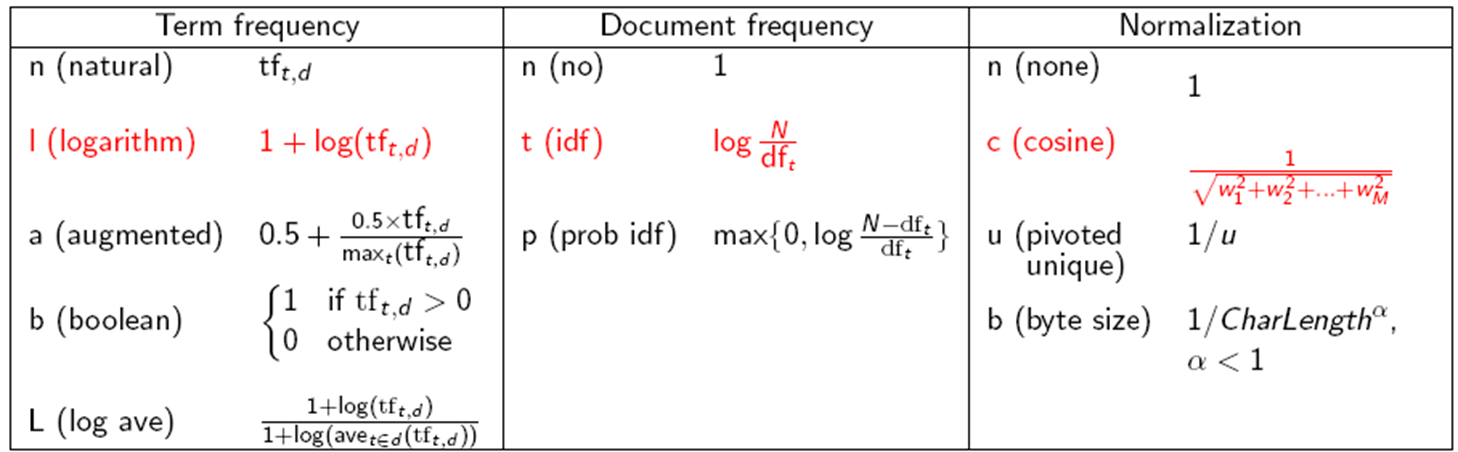

In [ ]:
def normalize_query(query):

  text = nlp(query).text
  tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
  return tokenizer.tokenize(text)

In [ ]:
def get_unique_words(doc_id, query_id, token_list):
  doc = token_list[doc_id]
  query = normalize_query(queries[query_id])

  return set(doc).union(set(query))

# Document

## tf

" **l** "

In [ ]:
def tf_d_l(d_id, q_id, token_list, df):

  tf_dict = {}
  unique_words = get_unique_words(d_id,q_id,token_list)

  for word in unique_words:
    if word in df.columns and df.loc[d_id][word] > 0:
      tf_dict[word] = 1 + np.log10(df.loc[d_id][word])
    else:
      tf_dict[word] = 0

  return tf_dict, [*tf_dict.values()]

" **b** "

In [ ]:
def tf_d_b(d_id, q_id, token_list, df):

  tf_dict = {}
  unique_words = get_unique_words(d_id,q_id,token_list)

  for word in unique_words:
    if word in df.columns :
      if df.loc[d_id][word] > 0:
        tf_dict[word] = 1
      else:
        tf_dict[word] = 0
    else:
      tf_dict[word] = 0

  return tf_dict, [*tf_dict.values()]

## idf

" **n** "

In [ ]:
def idf_d_n(d_id, q_id, token_list, df):
  unique_words = get_unique_words(d_id,q_id,token_list)
  idf_dict = {}

  for word in unique_words:
    idf_dict[word] = 1
  return idf_dict,[*idf_dict.values()]

" **t** "

In [ ]:
def idf_d_t(d_id, q_id, token_list, df):
  unique_words = get_unique_words(d_id,q_id,token_list)
  idf_dict = {}
  N = len(df.index)
  for word in unique_words:
    if word in df.columns:
      idf_dict[word] = np.log10(N/(len([w for w in df[word] if w>0])))
    else:
      idf_dict[word] = 0
  return idf_dict,[*idf_dict.values()]

## normalize

" **n** "

In [ ]:
def normal_d_n(tf_list, idf_list):
  tf_idf = [tf_list[i] * idf_list[i] for i in range(len(idf_list))]

  return [w for w in tf_idf]

" **c** "

In [ ]:
def normal_d_c(tf_list, idf_list):
  tf_idf = [tf_list[i] * idf_list[i] for i in range(len(idf_list))]
  normal = np.sqrt(sum(i*i for i in tf_idf))

  return [w / normal for w in tf_idf]

## tf - idf

" **lnc** "

In [ ]:
def tf_idf_d_lnc(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_d_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_d_n(d_id,q_id,token_list, df)

  return normal_d_c(tf_list, idf_list)

" **lnn** "

In [ ]:
def tf_idf_d_lnn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_d_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_d_n(d_id,q_id,token_list, df)

  return normal_d_n(tf_list, idf_list)

" **ltc** "

In [ ]:
def tf_idf_d_ltc(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_d_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_d_t(d_id,q_id,token_list, df)

  return normal_d_c(tf_list, idf_list)

" **ltn** "

In [ ]:
def tf_idf_d_ltn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_d_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_d_t(d_id,q_id,token_list, df)

  return normal_d_n(tf_list, idf_list)

" **bnn** "

In [ ]:
def tf_idf_d_bnn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_d_b(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_d_n(d_id,q_id,token_list, df)

  return normal_d_n(tf_list, idf_list)

In [ ]:
doc_ti = tf_idf_d_ltc(0,0,tokens,df_tokens)

# Query

## tf

" **l** "

In [ ]:
def tf_q_l(d_id,q_id,token_list, df):
  query = normalize_query(queries[q_id])
  tf_dict = {}
  unique_words = get_unique_words(d_id,q_id,token_list)

  for word in unique_words:
    if word in query and query.count(word)>0:
      tf_dict[word] = 1 + np.log10(query.count(word))
    else:
      tf_dict[word] = 0

  return tf_dict, [*tf_dict.values()]

" **b** "

In [ ]:
def tf_q_b(d_id,q_id,token_list, df):
  query = normalize_query(queries[q_id])
  tf_dict = {}
  unique_words = get_unique_words(d_id,q_id,token_list)

  for word in unique_words:
    if word in query:
      if query.count(word)>0:
        tf_dict[word] = 1
      else:
        tf_dict[word] = 0
    else:
      tf_dict[word] = 0

  return tf_dict, [*tf_dict.values()]

## idf

" **n** "

In [ ]:
def idf_q_n(d_id,q_id,token_list, df):
  query = normalize_query(queries[q_id])
  unique_words = get_unique_words(d_id,q_id,token_list)
  idf_dict = {}

  for word in unique_words:
    idf_dict[word] = 1
  return idf_dict,[*idf_dict.values()]

" **t** "

In [ ]:
def idf_q_t(d_id,q_id,token_list, df):
  query = normalize_query(queries[q_id])
  unique_words = get_unique_words(d_id,q_id,token_list)
  idf_dict = {}
  N = len(df.index)
  for word in unique_words:
    if word in query and  word in df.columns:
      idf_dict[word] = np.log10(N/(len([w for w in df[word] if w>0])))
    else:
      idf_dict[word] = 0
  return idf_dict,[*idf_dict.values()]

## normalize

" **n** "

In [ ]:
def normal_q_n(tf_list, idf_list):
  tf_idf = [tf_list[i] * idf_list[i] for i in range(len(idf_list))]

  return [w for w in tf_idf]

" **c** "

In [ ]:
def normal_q_c(tf_list, idf_list):
  tf_idf = [tf_list[i] * idf_list[i] for i in range(len(idf_list))]
  normal = np.sqrt(sum(i*i for i in tf_idf))

  return [w / normal for w in tf_idf]

## tf - idf

" **itc** "

In [ ]:
def tf_idf_q_ltc(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_q_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_q_t(d_id,q_id,token_list, df)

  return normal_q_c(tf_list, idf_list)

" **inc** "

In [ ]:
def tf_idf_q_lnc(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_q_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_q_n(d_id,q_id,token_list, df)

  return normal_q_c(tf_list, idf_list)

" **inn** "

In [ ]:
def tf_idf_q_lnn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_q_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_q_n(d_id,q_id,token_list, df)

  return normal_q_n(tf_list, idf_list)

" **itn** "

In [ ]:
def tf_idf_q_ltn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_q_l(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_q_t(d_id,q_id,token_list, df)

  return normal_q_n(tf_list, idf_list)

" **bnn** "

In [ ]:
def tf_idf_q_bnn(d_id, q_id, token_list, df):
  tf_dict, tf_list = tf_q_b(d_id,q_id,token_list, df)
  idf_dict, idf_list = idf_q_n(d_id,q_id,token_list, df)

  return normal_q_n(tf_list, idf_list)

# Scores

### LNC-LNC

In [ ]:
def score_lnc_lnc(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_lnc(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_lnc(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
retrieved_docs = []
print("LNC-LNC Score: ")
for i in range(len(body)):

  for doc in retrieved_docs:
    if doc[0] == i:
      break
  else:
    retrieved_docs.append((i, 0))

  for j in range(len(queries)):
    s = score_lnc_lnc(i,j,tokens,df_tokens)
    retrieved_docs[i] = (i, retrieved_docs[i][1] + s) ;
    scores += s

print(retrieved_docs)
print(scores)

LNC-LNC Score: 
[(0, 26.961336552556727), (1, 30.367466557113676), (2, 30.09551611000815), (3, 27.680525804091545), (4, 26.522198214924178), (5, 28.00851105504065), (6, 27.129943991044435), (7, 25.34635012741854), (8, 26.732405210813557), (9, 28.172177082545883), (10, 28.30788482762651), (11, 27.654721850771207), (12, 25.06317702411831), (13, 27.376772584980966), (14, 29.134458701662798), (15, 27.75597090852484), (16, 27.938629731425674), (17, 28.21861505978466), (18, 25.366200147856187), (19, 26.06392461079939), (20, 23.852985040130687), (21, 26.419846065047636), (22, 29.725778781042173), (23, 28.557390591555347), (24, 27.28042201561716), (25, 30.43193260612438), (26, 32.45914105553785), (27, 29.005848395067886), (28, 27.91178855920345), (29, 32.32958388516845), (30, 26.635323756114015), (31, 31.395943232713982), (32, 31.660585985969963), (33, 31.365753385080417), (34, 27.014568286741813), (35, 28.17667871466495), (36, 29.79764527118283), (37, 26.134052760402124), (38, 26.783233055558

### LNN-LNN

In [ ]:
def score_lnn_lnn(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_lnn(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_lnn(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
print("LNN-LNN Score: ")
for i in range(len(body)):
  for j in range(len(queries)):
    scores += score_lnn_lnn(i,j,tokens,df_tokens)

print(scores)

### INC-ITC

In [ ]:
def score_lnc_ltc(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_lnc(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_ltc(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
print("LNC-LTC Score: ")
for i in range(len(body)):
  for j in range(len(queries)):
    scores += score_lnc_ltc(i,j,tokens,df_tokens)

print(scores)

### ITC-ITC

In [ ]:
def score_ltc_ltc(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_ltc(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_ltc(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
print("LTC-LTC Score: ")
for i in range(len(body)):
  for j in range(len(queries)):
    scores += score_ltc_ltc(i,j,tokens,df_tokens)

print(scores)

## LTN-LTN

In [ ]:
def score_ltn_ltn(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_ltn(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_ltn(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
print("LTN-LTN Score: ")
for i in range(len(body)):
  for j in range(len(queries)):
    scores += score_ltn_ltn(i,j,tokens,df_tokens)

print(scores)

## BNN-BNN

In [ ]:
def score_bnn_bnn(d_id,q_id,token_list, df):
  doc_ti = tf_idf_d_bnn(d_id,q_id,token_list, df)
  qurey_ti = tf_idf_q_bnn(d_id,q_id,token_list, df)
  return sum([qurey_ti[i] * doc_ti[i] for i in range(len(qurey_ti))])

In [ ]:
scores = 0
print("BNN-BNN Score: ")
for i in range(len(body)):
  for j in range(len(queries)):
    scores += score_bnn_bnn(i,j,tokens,df_tokens)

print(scores)